In [1]:
import pandas as pd
import numpy as np
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

df = pd.read_csv('C:/Users/Rasmu/Downloads/ner_dataset.csv', encoding = "ISO-8859-1", error_bad_lines=False)
df = df[:100000]
df = df.fillna(method='ffill')
df.head()

C:\Users\Rasmu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [2]:
df['Sentence #'].nunique(), df.Word.nunique(), df.Tag.nunique()
df.groupby('Tag').size().reset_index(name='counts')

df["POS"].explode().unique() 

array(['NNS', 'IN', 'VBP', 'VBN', 'NNP', 'TO', 'VB', 'DT', 'NN', 'CC',
       'JJ', '.', 'VBD', 'WP', '``', 'CD', 'PRP', 'VBZ', 'POS', 'VBG',
       'RB', ',', 'WRB', 'PRP$', 'MD', 'WDT', 'JJR', ':', 'JJS', 'WP$',
       'RP', 'PDT', 'NNPS', 'EX', 'RBS', 'LRB', 'RRB', '$', 'RBR', ';',
       'UH'], dtype=object)

In [3]:
X = df.drop('Tag', axis=1)
v = DictVectorizer(sparse=False)

print(X.to_dict('records')[0])

X = v.fit_transform(X.to_dict('records'))
y = df.Tag.values
classes = np.unique(y)
classes = classes.tolist()
new_classes = classes.copy()
new_classes.pop()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

{'Sentence #': 'Sentence: 1', 'Word': 'Thousands', 'POS': 'NNS'}


In [4]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels = new_classes))

C:\Users\Rasmu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        24
       B-eve       0.00      0.00      0.00        19
       B-geo       0.50      0.94      0.65      1085
       B-gpe       0.92      0.71      0.80       556
       B-nat       0.00      0.00      0.00        12
       B-org       0.58      0.39      0.47       589
       B-per       0.72      0.45      0.55       564
       B-tim       0.89      0.68      0.77       611
       I-art       0.00      0.00      0.00        12
       I-eve       0.00      0.00      0.00        18
       I-geo       0.84      0.20      0.33       230
       I-gpe       0.00      0.00      0.00        14
       I-nat       0.00      0.00      0.00         2
       I-org       0.67      0.42      0.51       445
       I-per       0.60      0.63      0.62       591
       I-tim       1.00      0.02      0.03       194

   micro avg       0.63      0.59      0.61      4966
   macro avg       0.42   

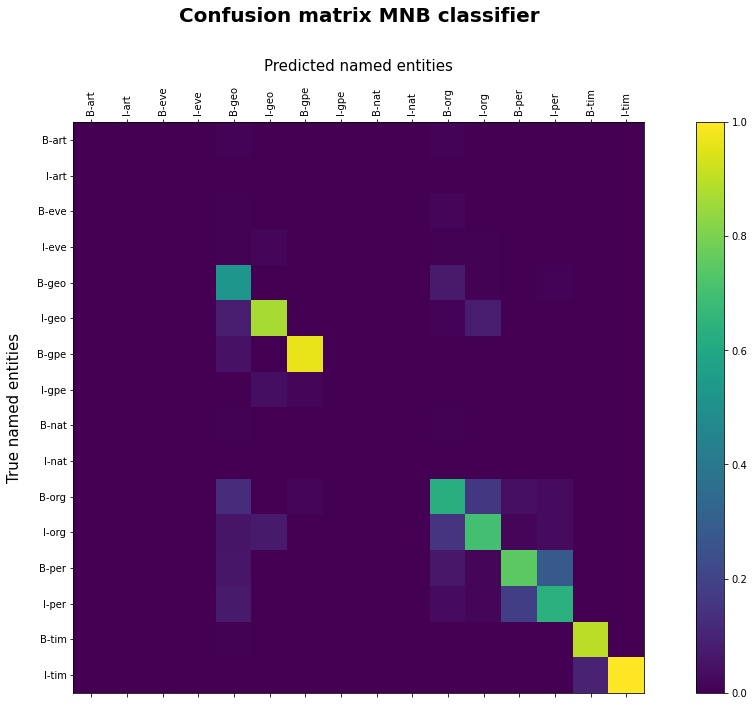

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sortedLabels = ['B-art','I-art','B-eve','I-eve','B-geo','I-geo','B-gpe','I-gpe','B-nat','I-nat','B-org','I-org','B-per','I-per','B-tim','I-tim']
cm = confusion_matrix(y_test, y_pred, labels=sortedLabels, normalize='pred')

fig = plt.figure( figsize=[18.5,10.5])
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
ax.set_xlabel('Predicted named entities', fontsize = 15, labelpad=15.0)
ax.xaxis.set_label_position('top')
ax.set_ylabel('True named entities', fontsize = 15, labelpad=15.0)
ax.set_title('Confusion matrix MNB classifier',fontweight="bold", size=20, pad=100.0)

fig.colorbar(cax)
plt.xticks(range(len(sortedLabels)), sortedLabels, rotation=90)
plt.yticks(range(len(sortedLabels)), sortedLabels)
plt.show()


In [ ]:
import spacy
import nltk
nltk.download()

spacy.prefer_gpu()
nlp = spacy.load("en_core_web_lg")

with open('C:/Users/Rasmu/Documents/Repos/BAC/Ezra/linguistic/spacy/dummyjobapplication.txt', 'r') as file:
    data = file.read().replace('\n', '')


text = nltk.word_tokenize(data)
nltk.pos_tag(text)

# doc = nlp(data)

# data_row = []
# sentence_row = []
# word_row = []
# pos_row = []

# for ind, sen in enumerate(doc.sents):
#     for token in sen:
#         data_row.append(["Sentence: " + str(ind), token.text, token.pos_])
#         sentence_row.append(("Sentence: " + str(ind)))
#         word_row.append(token.text)
#         pos_row.append(token.pos_)



Error: Session cannot generate requests

In [ ]:
data_df = pd.DataFrame(data_row, columns = ['Sentence #', 'Word', 'POS'])

data_df.head()

,Sentence #,Word,POS
0,Sentence: 0,John,PROPN
1,Sentence: 0,Doe,PROPN
2,Sentence: 0,Project,PROPN
3,Sentence: 0,Manager,PROPN
4,Sentence: 0,Doris,PROPN


In [ ]:
data_df["POS"].explode().unique() 

array(['PROPN', 'NUM', 'PUNCT', 'ADJ', 'NOUN', 'ADP', 'X', 'DET', 'ADV',
       'PRON', 'AUX', 'VERB', 'PART', 'CCONJ', 'SCONJ', 'INTJ'],
      dtype=object)